[![Open In Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/d2l-ai/d2l-pytorch-sagemaker-studio-lab/blob/main/chapter_multilayer-perceptrons/underfit-overfit.ipynb)

# 4.4 Model Selection, Underfitting, and Overfitting


As machine learning scientists,
our goal is to discover *patterns*.
But how can we be sure that we have
truly discovered a *general* pattern
and not simply memorized our data?
For example, imagine that we wanted to hunt
for patterns among genetic markers
linking patients to their dementia status,
where the labels are drawn from the set
$\{\text{dementia}, \text{mild cognitive impairment}, \text{healthy}\}$.
Because each person's genes identify them uniquely
(ignoring identical siblings),
it is possible to memorize the entire dataset.

We do not want our model to say
*"That's Bob! I remember him! He has dementia!"*
The reason why is simple.
When we deploy the model in the future,
we will encounter patients
that the model has never seen before.
Our predictions will only be useful
if our model has truly discovered a *general* pattern.

To recapitulate more formally,
our goal is to discover patterns
that capture regularities in the underlying population
from which our training set was drawn.
If we are successful in this endeavor,
then we could successfully assess risk
even for individuals that we have never encountered before.
This problem---how to discover patterns that *generalize*---is
the fundamental problem of machine learning.

The danger is that when we train models,
we access just a small sample of data.
The largest public image datasets contain
roughly one million images.
More often, we must learn from only thousands
or tens of thousands of data examples.
In a large hospital system, we might access
hundreds of thousands of medical records.
When working with finite samples, we run the risk
that we might discover apparent associations
that turn out not to hold up when we collect more data.

The phenomenon of fitting our training data
more closely than we fit the underlying distribution is called *overfitting*, and the techniques used to combat overfitting are called *regularization*.
In the previous sections, you might have observed
this effect while experimenting with the Fashion-MNIST dataset.
If you altered the model structure or the hyperparameters during the experiment, you might have noticed that with enough neurons, layers, and training epochs, the model can eventually reach perfect accuracy on the training set, even as the accuracy on test data deteriorates.


## 4.4.1 Training Error and Generalization Error

In order to discuss this phenomenon more formally,
we need to differentiate between training error and generalization error.
The *training error* is the error of our model
as calculated on the training dataset,
while *generalization error* is the expectation of our model's error
where we apply it to an infinite stream of additional data examples
drawn from the same underlying data distribution as our original sample.

Problematically, we can never calculate the generalization error exactly.
That is because the stream of infinite data is an imaginary object.
In practice, we must *estimate* the generalization error
by applying our model to an independent test set
constituted of a random selection of data examples
that were withheld from our training set.

The following three thought experiments
will help illustrate this situation better.
Consider a college student trying to prepare for his final exam.
A diligent student will strive to practice well
and test his abilities using exams from previous years.
Nonetheless, doing well on past exams is no guarantee
that he will excel when it matters.
For instance, the student might try to prepare
by rote learning the answers to the exam questions.
This requires the student to memorize many things.
She might even remember the answers for past exams perfectly.
Another student might prepare by trying to understand
the reasons for giving certain answers.
In most cases, the latter student will do much better.

Likewise, consider a model that simply uses a lookup table to answer questions. If the set of allowable inputs is discrete and reasonably small, then perhaps after viewing *many* training examples, this approach would perform well. Still this model has no ability to do better than random guessing when faced with examples that it has never seen before.
In reality the input spaces are far too large to memorize the answers corresponding to every conceivable input. For example, consider the black and white $28\times28$ images. If each pixel can take one among $256$ grayscale values, then there are $256^{784}$ possible images. That means that there are far more low-resolution grayscale thumbnail-sized images than there are atoms in the universe. Even if we could encounter such data, we could never afford to store the lookup table.

Last, consider the problem of trying
to classify the outcomes of coin tosses (class 0: heads, class 1: tails)
based on some contextual features that might be available.
Suppose that the coin is fair.
No matter what algorithm we come up with,
the generalization error will always be $\frac{1}{2}$.
However, for most algorithms,
we should expect our training error to be considerably lower,
depending on the luck of the draw,
even if we did not have any features!
Consider the dataset {0, 1, 1, 1, 0, 1}.
Our feature-less algorithm would have to fall back on always predicting
the *majority class*, which appears from our limited sample to be *1*.
In this case, the model that always predicts class 1
will incur an error of $\frac{1}{3}$,
considerably better than our generalization error.
As we increase the amount of data,
the probability that the fraction of heads
will deviate significantly from $\frac{1}{2}$ diminishes,
and our training error would come to match the generalization error.

### 4.4.1.1 Statistical Learning Theory

Since generalization is the fundamental problem in machine learning,
you might not be surprised to learn
that many mathematicians and theorists have dedicated their lives
to developing formal theories to describe this phenomenon.
In their [eponymous theorem](https://en.wikipedia.org/wiki/Glivenko%E2%80%93Cantelli_theorem), Glivenko and Cantelli
derived the rate at which the training error
converges to the generalization error.
In a series of seminal papers, [Vapnik and Chervonenkis](https://en.wikipedia.org/wiki/Vapnik%E2%80%93Chervonenkis_theory)
extended this theory to more general classes of functions.
This work laid the foundations of statistical learning theory.


In the standard supervised learning setting, which we have addressed up until now and will stick with throughout most of this book,
we assume that both the training data and the test data
are drawn *independently* from *identical* distributions.
This is commonly called the *i.i.d. assumption*,
which means that the process that samples our data has no memory.
In other words,
the second example drawn and the third drawn
are no more correlated than the second and the two-millionth sample drawn.

Being a good machine learning scientist requires thinking critically,
and already you should be poking holes in this assumption,
coming up with common cases where the assumption fails.
What if we train a mortality risk predictor
on data collected from patients at UCSF Medical Center,
and apply it on patients at Massachusetts General Hospital?
These distributions are simply not identical.
Moreover, draws might be correlated in time.
What if we are classifying the topics of Tweets?
The news cycle would create temporal dependencies
in the topics being discussed, violating any assumptions of independence.

Sometimes we can get away with minor violations of the i.i.d. assumption
and our models will continue to work remarkably well.
After all, nearly every real-world application
involves at least some minor violation of the i.i.d. assumption,
and yet we have many useful tools for
various applications such as
face recognition,
speech recognition, and language translation.

Other violations are sure to cause trouble.
Imagine, for example, if we try to train
a face recognition system by training it
exclusively on university students
and then want to deploy it as a tool
for monitoring geriatrics in a nursing home population.
This is unlikely to work well since college students
tend to look considerably different from the elderly.

In subsequent chapters, we will discuss problems
arising from violations of the i.i.d. assumption.
For now, even taking the i.i.d. assumption for granted,
understanding generalization is a formidable problem.
Moreover, elucidating the precise theoretical foundations
that might explain why deep neural networks generalize as well as they do
continues to vex the greatest minds in learning theory.

When we train our models, we attempt to search for a function
that fits the training data as well as possible.
If the function is so flexible that it can catch on to spurious patterns
just as easily as to true associations,
then it might perform *too well* without producing a model
that generalizes well to unseen data.
This is precisely what we want to avoid or at least control.
Many of the techniques in deep learning are heuristics and tricks
aimed at guarding against overfitting.

### 4.4.1.2 Model Complexity

When we have simple models and abundant data,
we expect the generalization error to resemble the training error.
When we work with more complex models and fewer examples,
we expect the training error to go down but the generalization gap to grow.
What precisely constitutes model complexity is a complex matter.
Many factors govern whether a model will generalize well.
For example a model with more parameters might be considered more complex.
A model whose parameters can take a wider range of values
might be more complex.
Often with neural networks, we think of a model
that takes more training iterations as more complex,
and one subject to *early stopping* (fewer training iterations) as less complex.

It can be difficult to compare the complexity among members
of substantially different model classes
(say, decision trees vs. neural networks).
For now, a simple rule of thumb is quite useful:
a model that can readily explain arbitrary facts
is what statisticians view as complex,
whereas one that has only a limited expressive power
but still manages to explain the data well
is probably closer to the truth.
In philosophy, this is closely related to Popper's
criterion of falsifiability
of a scientific theory: a theory is good if it fits data
and if there are specific tests that can be used to disprove it.
This is important since all statistical estimation is
*post hoc*,
i.e., we estimate after we observe the facts,
hence vulnerable to the associated fallacy.
For now, we will put the philosophy aside and stick to more tangible issues.

In this section, to give you some intuition,
we will focus on a few factors that tend
to influence the generalizability of a model class:

1. The number of tunable parameters. When the number of tunable parameters, sometimes called the *degrees of freedom*, is large, models tend to be more susceptible to overfitting.
1. The values taken by the parameters. When weights can take a wider range of values, models can be more susceptible to overfitting.
1. The number of training examples. It is trivially easy to overfit a dataset containing only one or two examples even if your model is simple. But overfitting a dataset with millions of examples requires an extremely flexible model.

## 4.4.2 Model Selection

In machine learning, we usually select our final model
after evaluating several candidate models.
This process is called *model selection*.
Sometimes the models subject to comparison
are fundamentally different in nature
(say, decision trees vs. linear models).
At other times, we are comparing
members of the same class of models
that have been trained with different hyperparameter settings.

With MLPs, for example,
we may wish to compare models with
different numbers of hidden layers,
different numbers of hidden units,
and various choices of the activation functions
applied to each hidden layer.
In order to determine the best among our candidate models,
we will typically employ a validation dataset.


### 4.4.2.1 Validation Dataset

In principle we should not touch our test set
until after we have chosen all our hyperparameters.
Were we to use the test data in the model selection process,
there is a risk that we might overfit the test data.
Then we would be in serious trouble.
If we overfit our training data,
there is always the evaluation on test data to keep us honest.
But if we overfit the test data, how would we ever know?


Thus, we should never rely on the test data for model selection.
And yet we cannot rely solely on the training data
for model selection either because
we cannot estimate the generalization error
on the very data that we use to train the model.


In practical applications, the picture gets muddier.
While ideally we would only touch the test data once,
to assess the very best model or to compare
a small number of models to each other,
real-world test data is seldom discarded after just one use.
We can seldom afford a new test set for each round of experiments.

The common practice to address this problem
is to split our data three ways,
incorporating a *validation dataset* (or *validation set*)
in addition to the training and test datasets.
The result is a murky practice where the boundaries
between validation and test data are worryingly ambiguous.
Unless explicitly stated otherwise, in the experiments in this book
we are really working with what should rightly be called
training data and validation data, with no true test sets.
Therefore, the accuracy reported in each experiment of the book is really the validation accuracy and not a true test set accuracy.

### 4.4.2.2 $K$-Fold Cross-Validation

When training data is scarce,
we might not even be able to afford to hold out
enough data to constitute a proper validation set.
One popular solution to this problem is to employ
$K$*-fold cross-validation*.
Here, the original training data is split into $K$ non-overlapping subsets.
Then model training and validation are executed $K$ times,
each time training on $K-1$ subsets and validating
on a different subset (the one not used for training in that round).
Finally, the training and validation errors are estimated
by averaging over the results from the $K$ experiments.

## 4.4.3 Underfitting or Overfitting?

When we compare the training and validation errors,
we want to be mindful of two common situations.
First, we want to watch out for cases
when our training error and validation error are both substantial
but there is a little gap between them.
If the model is unable to reduce the training error,
that could mean that our model is too simple
(i.e., insufficiently expressive)
to capture the pattern that we are trying to model.
Moreover, since the *generalization gap*
between our training and validation errors is small,
we have reason to believe that we could get away with a more complex model.
This phenomenon is known as *underfitting*.

On the other hand, as we discussed above,
we want to watch out for the cases
when our training error is significantly lower
than our validation error, indicating severe *overfitting*.
Note that overfitting is not always a bad thing.
With deep learning especially, it is well known
that the best predictive models often perform
far better on training data than on holdout data.
Ultimately, we usually care more about the validation error
than about the gap between the training and validation errors.

Whether we overfit or underfit can depend
both on the complexity of our model
and the size of the available training datasets,
two topics that we discuss below.

### 4.4.3.1 Model Complexity

To illustrate some classical intuition
about overfitting and model complexity,
we give an example using polynomials.
Given training data consisting of a single feature $x$
and a corresponding real-valued label $y$,
we try to find the polynomial of degree $d$

$$\hat{y}= \sum_{i=0}^d x^i w_i$$<i style="float: right">(4.4.1)</i><br/><br/>

to estimate the labels $y$.
This is just a linear regression problem
where our features are given by the powers of $x$,
the model's weights are given by $w_i$,
and the bias is given by $w_0$ since $x^0 = 1$ for all $x$.
Since this is just a linear regression problem,
we can use the squared error as our loss function.


A higher-order polynomial function is more complex
than a lower-order polynomial function,
since the higher-order polynomial has more parameters
and the model function's selection range is wider.
Fixing the training dataset,
higher-order polynomial functions should always
achieve lower (at worst, equal) training error
relative to lower degree polynomials.
In fact, whenever the data examples each have a distinct value of $x$,
a polynomial function with degree equal to the number of data examples
can fit the training set perfectly.
We visualize the relationship between polynomial degree
and underfitting vs. overfitting in [Fig. 4.4.1](#fig4.4.1).

![Influence of model complexity on underfitting and overfitting](../img/capacity-vs-error.svg)
<center id="fig4.4.1"><i>Fig. 4.4.1 Influence of model complexity on underfitting and overfitting</i></center>

### 4.4.3.2 Dataset Size

The other big consideration to bear in mind is the dataset size.
Fixing our model, the fewer samples we have in the training dataset,
the more likely (and more severely) we are to encounter overfitting.
As we increase the amount of training data,
the generalization error typically decreases.
Moreover, in general, more data never hurt.
For a fixed task and data distribution,
there is typically a relationship between model complexity and dataset size.
Given more data, we might profitably attempt to fit a more complex model.
Absent sufficient data, simpler models may be more difficult to beat.
For many tasks, deep learning only outperforms linear models
when many thousands of training examples are available.
In part, the current success of deep learning
owes to the current abundance of massive datasets
due to Internet companies, cheap storage, connected devices,
and the broad digitization of the economy.

## 4.4.4 Polynomial Regression

We can now explore these concepts interactively
by fitting polynomials to data.


In [1]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 4.4.4.1 Generating the Dataset

First we need data. Given $x$, we will use the following cubic polynomial to generate the labels on training and test data:

$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.1^2).$$

The noise term $\epsilon$ obeys a normal distribution
with a mean of 0 and a standard deviation of 0.1.
For optimization, we typically want to avoid
very large values of gradients or losses.
This is why the *features*
are rescaled from $x^i$ to $\frac{x^i}{i!}$.
It allows us to avoid very large values for large exponents $i$.
We will synthesize 100 samples each for the training set and test set.


In [2]:
max_degree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 100  # Training and test dataset sizes
true_w = np.zeros(max_degree)  # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

Again, monomials stored in `poly_features`
are rescaled by the gamma function,
where $\Gamma(n)=(n-1)!$.
Take a look at the first 2 samples from the generated dataset.
The value 1 is technically a feature,
namely the constant feature corresponding to the bias.


In [3]:
# Convert from NumPy ndarrays to tensors
true_w, features, poly_features, labels = [
    torch.tensor(x, dtype=torch.float32)
    for x in [true_w, features, poly_features, labels]]

In [4]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.0786],
         [-0.7587]]),
 tensor([[ 1.0000e+00, -7.8595e-02,  3.0886e-03, -8.0915e-05,  1.5899e-06,
          -2.4991e-08,  3.2736e-10, -3.6755e-12,  3.6110e-14, -3.1533e-16,
           2.4784e-18, -1.7708e-20,  1.1598e-22, -7.0117e-25,  3.9363e-27,
          -2.0625e-29,  1.0131e-31, -4.6839e-34,  2.0452e-36, -8.4599e-39],
         [ 1.0000e+00, -7.5875e-01,  2.8785e-01, -7.2802e-02,  1.3810e-02,
          -2.0956e-03,  2.6501e-04, -2.8725e-05,  2.7243e-06, -2.2968e-07,
           1.7427e-08, -1.2020e-09,  7.6004e-11, -4.4360e-12,  2.4042e-13,
          -1.2161e-14,  5.7670e-16, -2.5739e-17,  1.0850e-18, -4.3328e-20]]),
 tensor([4.8641, 2.5988]))

### 4.4.4.2 Training and Testing the Model

Let us first implement a function to evaluate the loss on a given dataset.


In [5]:
def evaluate_loss(net, data_iter, loss):  #@save
    """Evaluate the loss of a model on the given dataset."""
    metric = d2l.Accumulator(2)  # Sum of losses, no. of examples
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [6]:
?torch.numel

Docstring:
numel(input) -> int

Returns the total number of elements in the :attr:`input` tensor.

Args:
    input (Tensor): the input tensor.

Example::

    >>> a = torch.randn(1, 2, 3, 4, 5)
    >>> torch.numel(a)
    120
    >>> a = torch.zeros(4,4)
    >>> torch.numel(a)
    16
Type:      builtin_function_or_method


Now define the training function.


In [7]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(
                net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

In [8]:
train

<function __main__.train(train_features, test_features, train_labels, test_labels, num_epochs=400)>

### 4.4.4.3 Third-Order Polynomial Function Fitting (Normal)

We will begin by first using a third-order polynomial function, which is the same order as that of the data generation function.
The results show that this model's training and test losses can be both effectively reduced.
The learned model parameters are also close
to the true values $w = [5, 1.2, -3.4, 5.6]$.


weight: [[ 5.0046816  1.2074656 -3.4042082  5.5218697]]


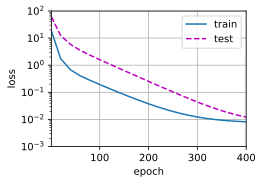

In [9]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

### 4.4.4.4 Linear Function Fitting (Underfitting)

Let us take another look at linear function fitting.
After the decline in early epochs,
it becomes difficult to further decrease
this model's training loss.
After the last epoch iteration has been completed,
the training loss is still high.
When used to fit nonlinear patterns
(like the third-order polynomial function here)
linear models are liable to underfit.


weight: [[3.643655  3.1640103]]


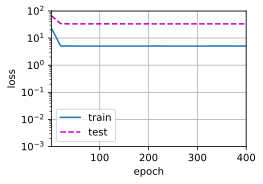

In [10]:
# Pick the first two dimensions, i.e., 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### 4.4.4.5 Higher-Order Polynomial Function Fitting  (Overfitting)

Now let us try to train the model
using a polynomial of too high degree.
Here, there are insufficient data to learn that
the higher-degree coefficients should have values close to zero.
As a result, our overly-complex model
is so susceptible that it is being influenced
by noise in the training data.
Though the training loss can be effectively reduced,
the test loss is still much higher.
It shows that
the complex model overfits the data.


weight: [[ 4.991964    1.1900457  -3.3173933   5.38056    -0.3033002   1.026807
   0.21146703  0.21386352 -0.1805597  -0.03930749 -0.17351934  0.05365737
  -0.05360087  0.05933822  0.06931353 -0.19376768 -0.18540119  0.04267656
   0.147558    0.10113137]]


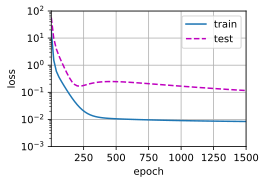

In [11]:
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

In the subsequent sections, we will continue
to discuss overfitting problems
and methods for dealing with them,
such as weight decay and dropout.


## 4.4.5 Summary

* Since the generalization error cannot be estimated based on the training error, simply minimizing the training error will not necessarily mean a reduction in the generalization error. Machine learning models need to be careful to safeguard against overfitting so as to minimize the generalization error.
* A validation set can be used for model selection, provided that it is not used too liberally.
* Underfitting means that a model is not able to reduce the training error. When training error is much lower than validation error, there is overfitting.
* We should choose an appropriately complex model and avoid using insufficient training samples.


## 4.4.6 Exercises

1. Can you solve the polynomial regression problem exactly? Hint: use linear algebra.
1. Consider model selection for polynomials:
    1. Plot the training loss vs. model complexity (degree of the polynomial). What do you observe? What degree of polynomial do you need to reduce the training loss to 0?
    1. Plot the test loss in this case.
    1. Generate the same plot as a function of the amount of data.
1. What happens if you drop the normalization ($1/i!$) of the polynomial features $x^i$? Can you fix this in some other way?
1. Can you ever expect to see zero generalization error?


In [12]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=1500):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    # animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
    #                         xlim=[1, num_epochs], ylim=[1e-3, 1e2],
    #                         legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        # if epoch == 0 or (epoch + 1) % 20 == 0:
        #     animator.add(epoch + 1, (evaluate_loss(
        #         net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    
    print('weight:', net[0].weight.data.numpy())
    train_loss = evaluate_loss(net, train_iter, loss)
    test_loss = evaluate_loss(net, test_iter, loss)
    return train_loss, test_loss

In [13]:
import matplotlib.pyplot as plt

In [15]:
model_complexity = np.arange(max_degree)
train_losses = []
test_losses = []
for degree in model_complexity:
    train_loss, test_loss = train(poly_features[:n_train, :degree+1], poly_features[n_train:, :degree+1], labels[:n_train], labels[n_train:], num_epochs=1500)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

weight: [[3.8008685]]
weight: [[3.6449146 3.1585078]]
weight: [[ 4.9848146  3.4167385 -3.2282267]]
weight: [[ 5.0052857  1.1551868 -3.4081578  5.6446157]]
weight: [[ 4.9952292   1.1526284  -3.3473732   5.6501412  -0.18547001]]
weight: [[ 4.9888663   1.1995608  -3.3042905   5.3091035  -0.31905428  1.3325415 ]]
weight: [[ 4.993571    1.2018125  -3.3301368   5.297132   -0.24274759  1.3698807
   0.02903879]]
weight: [[ 4.9921985   1.1888665  -3.3267334   5.3872075  -0.21052574  1.0321674
  -0.28727984 -0.07871643]]
weight: [[ 4.9868717   1.1951765  -3.2911215   5.3359814  -0.33375245  1.2170105
  -0.194802    0.14760119  0.17928007]]
weight: [[ 4.9935837   1.2030482  -3.3306804   5.2906785  -0.23137586  1.3980592
  -0.05652083 -0.03489526  0.19685254  0.18108453]]
weight: [[ 4.9935694   1.2008091  -3.3271592   5.302641   -0.2666065   1.3497424
   0.15902594 -0.02971364 -0.19365968  0.29003662 -0.07694411]]
weight: [[ 4.989011    1.1904358  -3.3017395   5.3722873  -0.33049622  1.1009966
   

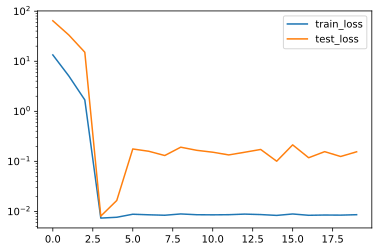

In [16]:
plt.yscale('log')
plt.plot(model_complexity, train_losses, label = 'train_loss')
plt.plot(model_complexity, test_losses, label = 'test_loss')
plt.legend()

In [17]:
def data_generation(num, scaling = True):
    max_degree = 20  # Maximum degree of the polynomial
    n_train, n_test = num, num  # Training and test dataset sizes
    true_w = np.zeros(max_degree)  # Allocate lots of empty space
    true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

    features = np.random.normal(size=(n_train + n_test, 1))
    np.random.shuffle(features)
    poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
    if scaling:
        for i in range(max_degree):
            #poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
            poly_features[:, i] /= 10 ** i
    # Shape of `labels`: (`n_train` + `n_test`,)
    labels = np.dot(poly_features, true_w)
    labels += np.random.normal(scale=0.1, size=labels.shape)
    true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]
    return poly_features, labels

In [18]:
def plot(poly_features, labels):
    model_complexity = np.arange(max_degree)
    train_losses = []
    test_losses = []
    for degree in model_complexity:
        train_loss, test_loss = train(poly_features[:n_train, :degree+1], poly_features[n_train:, :degree+1], labels[:n_train], labels[n_train:], num_epochs=1500)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
    return train_losses, test_losses

In [19]:
poly_features, labels = data_generation(100, False)

In [20]:
train_losses, test_losses = plot(poly_features,labels)

weight: [[0.07336627]]
weight: [[ 3.2281058 17.373371 ]]
weight: [[ 5.2917504 17.154371  -2.391655 ]]
weight: [[ 4.9961576  1.188349  -3.405756   5.6003203]]
weight: [[nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan nan nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
weight: [[nan nan nan nan nan 

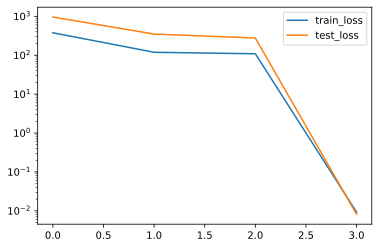

In [21]:
plt.yscale('log')
plt.plot(model_complexity, train_losses, label = 'train_loss')
plt.plot(model_complexity, test_losses, label = 'test_loss')
plt.legend()

In [22]:
poly_features, labels = data_generation(100, True)

In [23]:
train_losses, test_losses = plot(poly_features,labels)

weight: [[4.96161]]
weight: [[4.956025  0.8942795]]
weight: [[4.955718   0.91184425 0.02403255]]
weight: [[4.953794   0.90619624 0.19418627 0.347164  ]]
weight: [[ 4.954779    0.8899797   0.14020759  0.12253243 -0.42918676]]
weight: [[ 4.955793    0.91750884  0.037092    0.2654019  -0.06277733 -0.0497603 ]]
weight: [[ 4.9590597   0.94116503 -0.2943211  -0.07234353  0.05898676  0.2529528
   0.32772276]]
weight: [[ 4.9537435   0.8959117   0.22175188 -0.0228015   0.12466964 -0.14401656
   0.04807997  0.26352674]]
weight: [[ 4.9580245e+00  9.2375189e-01 -1.7582674e-01 -1.4128989e-01
   2.7256551e-01  1.5345030e-03 -1.6840455e-01 -1.6084526e-01
  -2.3549354e-01]]
weight: [[ 4.9553003e+00  8.9829057e-01  4.3406565e-02  1.5898901e-01
  -2.9027775e-01 -7.9448536e-02  7.4397251e-02 -7.6506384e-02
   8.4010069e-04 -1.4865744e-01]]
weight: [[ 4.955118    0.8920046   0.05258944  0.23326309  0.25207478  0.08644651
  -0.09460734  0.07210278 -0.28129146 -0.08107881 -0.03672132]]
weight: [[ 4.955431  

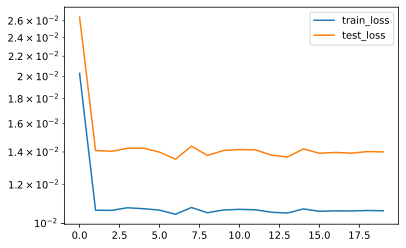

In [24]:
plt.yscale('log')
plt.plot(model_complexity, train_losses, label = 'train_loss')
plt.plot(model_complexity, test_losses, label = 'test_loss')
plt.legend()